# 3. Polynomial Regression

### 공부 시간에 따른 시험 점수 (우등생)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("../../database/PolynomialRegressionData.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)  # 전체 데이터로 학습

LinearRegression()

### 데이터 시각화 (전체)

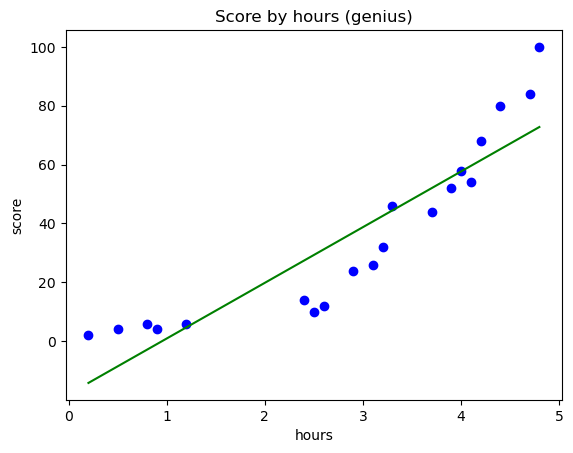

In [4]:
plt.scatter(X, y, c="b")
plt.plot(X, lin_reg.predict(X), c="g")
plt.title("Score by hours (genius)")  # 제목 설정
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

## 3-2. 다항 회귀 (Polynomial Regression)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=4)  # 2차
X_poly = poly_feat.fit_transform(X)  # fit + transform
X_poly[:5]  # [x] -> [x^0, x^1, x^2] -> x 가 3이라면 [1 ,3, 9] 로 변경

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [6]:
poly_feat.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [7]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [8]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)  # 변환된 X 와 y 로 모델 생성 (학습)

LinearRegression()

### 데이터 시각화 (변환된 X 와 y)

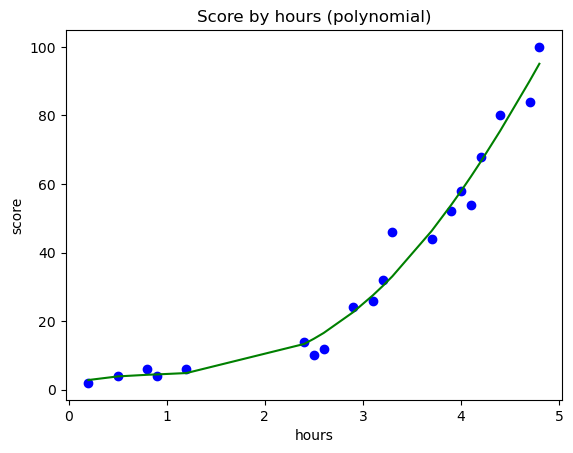

In [9]:
plt.scatter(X, y, c="b")
plt.plot(X, poly_reg.predict(poly_feat.fit_transform(X)), c="g")
plt.title("Score by hours (polynomial)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [10]:
X_range = np.arange(min(X), max(X), 0.1)  # X 의 최솟값에서 최댓값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [11]:
X_range.shape

(46,)

In [12]:
X.shape

(20, 1)

In [13]:
X_range = X_range.reshape(-1, 1)  # row 개수는 자동으로 계산, column 개수는 1개
# X_range.reshape(len(X_range), 1)
X_range.shape

(46, 1)

In [14]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

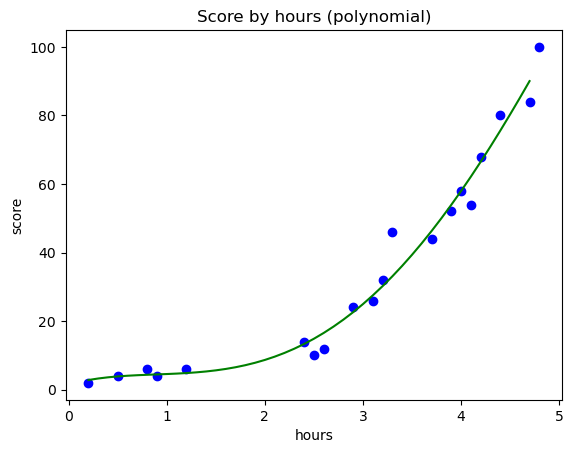

In [15]:
plt.scatter(X, y, c="b")
plt.plot(X_range, poly_reg.predict(poly_feat.fit_transform(X_range)), c="g")
plt.title("Score by hours (polynomial)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

## 공부 시간에 따른 시험 성적 예측

In [16]:
lin_reg.predict([[2]])  # 2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [17]:
poly_reg.predict(poly_feat.fit_transform([[2]]))  # 2시간을 공부했을 때 다항 회귀 모델의 예측

array([8.70559135])

In [18]:
lin_reg.score(X, y)

0.8169296513411765

In [19]:
poly_reg.score(X_poly, y)

0.9782775579000045